# LOADING DATA IN PYTORCH

## 1. Import necessary libraries for loading our data

In [1]:
import torch
import torchaudio

## 2. Access the data in the dataset

In [2]:
torchaudio.datasets.YESNO(
    root='./',
    url='http://www.openslr.org/resources/1/waves_yesno.tar.gz',
    folder_in_archive='waves_yesno',
    download=True
)

100.0%


In [3]:
# * ``download``: If true, downloads the dataset from the internet and puts it in root directory. If dataset is already downloaded, it is not downloaded again.
#
# Let’s access our Yesno data:
#

# A data point in Yesno is a tuple (waveform, sample_rate, labels) where labels
# is a list of integers with 1 for yes and 0 for no.
yesno_data = torchaudio.datasets.YESNO('./', download=True)

# Pick data point number 3 to see an example of the yesno_data:
n = 3
waveform, sample_rate, labels = yesno_data[n]
print("Waveform: {}\nSample rate: {}\nLabels: {}".format(waveform, sample_rate, labels))

Waveform: tensor([[ 3.0518e-05,  6.1035e-05,  3.0518e-05,  ..., -1.8311e-04,
          4.2725e-04,  6.7139e-04]])
Sample rate: 8000
Labels: [0, 0, 1, 0, 0, 0, 1, 0]


## 3. Loading the data

In [4]:
data_loader = torch.utils.data.DataLoader(yesno_data,
                                          batch_size=1,
                                          shuffle=True)

## 4. Iterate over the data

In [7]:
for data in data_loader:
    print("Data: ", data)
    print("Waveform: {}\nSample rate: {}\nLabels: {}".format(data[0], data[1], data[2]))
    break

Data:  [tensor([[[3.0518e-05, 6.1035e-05, 3.0518e-05,  ..., 3.4790e-03,
          3.5095e-03, 3.7842e-03]]]), tensor([8000]), [tensor([1]), tensor([0]), tensor([1]), tensor([1]), tensor([0]), tensor([1]), tensor([1]), tensor([1])]]
Waveform: tensor([[[3.0518e-05, 6.1035e-05, 3.0518e-05,  ..., 3.4790e-03,
          3.5095e-03, 3.7842e-03]]])
Sample rate: tensor([8000])
Labels: [tensor([1]), tensor([0]), tensor([1]), tensor([1]), tensor([0]), tensor([1]), tensor([1]), tensor([1])]


## 5. \[Optional\] Visualize the data

[[3.0517578e-05 6.1035156e-05 3.0517578e-05 ... 3.4790039e-03
  3.5095215e-03 3.7841797e-03]]


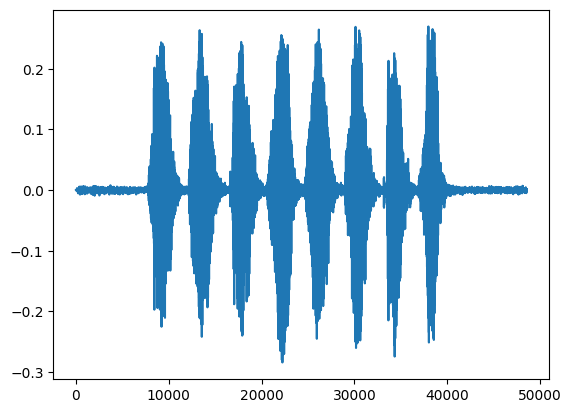

In [8]:
import matplotlib.pyplot as plt

print(data[0][0].numpy())

plt.figure()
plt.plot(waveform.t().numpy())